<a href="https://colab.research.google.com/github/pranav-viswa/Restaurant-analysis/blob/master/GG_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
!pip install seaborn 
!pip install squarify
!pip install plotly --upgrade
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import squarify

# Data

In [ ]:

df=pd.read_csv('/content/sample_data_set_2 - Sheet1 (1) (2).csv')
df

,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks
0,08 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3932330,3926253,99.9%,3849749,98.1%,10199,0
1,08 Sep 2020,(SDK X) Cricket Mazza,320x50,Unresolved,0.0,3932330,119,99.9%,118,99.2%,2,2
2,08 Sep 2020,(SDK X) Cricket Mazza,Dream11_320x50,Unresolved,0.0,3932330,96,99.9%,93,96.9%,2,2
3,08 Sep 2020,(SDK X) Cricket Mazza,My11_320x50,Unresolved,0.0,3932330,111,99.9%,110,99.1%,2,2
4,06 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3839002,3834328,99.9%,3785127,98.7%,9492,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48288,10 Sep 2020,NaN,revshare,Unresolved,0.0,0,0,0.00%,0,0.00%,0,0
48289,10 Sep 2020,SDK X Native Sample,SDK X Test Ads,Haryana,0.0,0,0,0.00%,0,0.00%,0,0
48290,12 Sep 2020,NaN,IPL banner,Maharashtra,0.0,0,0,0.00%,0,0.00%,0,0
48291,12 Sep 2020,NaN,RC_MH_Stock_Marathi,Maharashtra,0.0,0,0,0.00%,0,0.00%,0,0


# Q1

Multiple Ways in increasing the overall Revenue of app are found below:

In [ ]:
##Requesting more Ads on those app having good revenue . Taking greater than equal to 0.5 as a threshold
df_revenue=df[df['Revenue']>= 0.5]
df_revenue1=df_revenue[['App','Revenue']].groupby(by=['App']).sum().reset_index().sort_values(by='Revenue',ascending=False)
df_revenue1.head(10)


,App,Revenue
5,Callbreak Multiplayer,844.50
3,Bottle Shooting Game,685.32
25,World Cricket Championship 2,581.73
23,Traffic Bangalore: Check Fines,271.55
24,World Cricket Championship Lt,135.20
7,Indian Rummy Offline,102.73
22,Tarot Cards Reading and Numerology App,98.83
10,Mindi Offline,85.75
20,Sticker Maker,54.57
8,Indian Train Simulator 2018,52.62


In [ ]:

import plotly.express as px
df_1 =df_revenue1.head(10)
fig = px.pie(df_1, values='Revenue', names='App',color_discrete_sequence=px.colors.sequential.Reds_r)
fig.update_traces(textposition='outside', textinfo='label',hole=.3,rotation=-80,direction='clockwise')
fig.update_layout(
    autosize=False,
    width=800,
    height=800,)
fig.update_layout(showlegend=False)
fig.update_layout(font_size=18)
#fig.update_layout(annotations=[dict(text='SUV with', x=0.5, y=0.5, font_size=15, showarrow=False)])
fig.show()

In [ ]:
## Requesting Ads on app That has most number of impressions (Here considering threshold greater than 10k impressions)
df_impression=df[df['Impressions']>= 100000]
df_impression=df_impression[['Ad Group','Impressions']].groupby(by=['Ad Group']).sum().reset_index().sort_values(by='Impressions',ascending=False)
df_impression.head(10)
## THESE ARE THE AD GROUPS WHERE THERE HAS BEEN A POSITIVE  IMPRESSION , SO requesting these over the top app games will be one way to increase revenue

,Ad Group,Impressions
5,Cricket Mazza Banner (AdX),46516637
7,Dream11_NonCore,44778668
9,IPL banner,13248806
10,MY11Circle_IN_SG_1500,13174345
15,Rooter_Callbreak,11138160
21,revshare,4381106
3,Callbreak Multiplayer2_Admob_L,3371822
8,Gujrati_GL,2581486
6,Dhani Backfill,1224920
13,RC_GJ_Stock,1130588


In [ ]:
df.columns

Index(['Date', 'App', 'Ad Group', 'State', 'Revenue', 'Ad Requests',
       'Ad Responses', 'Fill Rate', 'Impressions', 'Render Rate', '1st Clicks',
       '2nd Clicks'],
      dtype='object')

In [ ]:
## Advertising on app games ,those ads where user has made 2nd click
## Threshold >500
df_2nd=df[['Ad Group','2nd Clicks']]
df_2nd_1=df_2nd[df_2nd['2nd Clicks']>500]
df_2nd_1=df_2nd[['Ad Group','2nd Clicks']].groupby(by=['Ad Group']).sum().reset_index().sort_values(by='2nd Clicks',ascending=False)
df_2nd_1.head(10)

,Ad Group,2nd Clicks
182,revshare,244286
76,MY11Circle_IN_SG_1500,133980
123,Rooter_Cricket,122793
65,IPL banner,122258
56,Dream11_NonCore,120575
122,Rooter_Callbreak,101055
54,Dream11,92499
121,Rooter_All apps,41313
30,Bottle Shooting Game_Admob_ML,35054
74,Live Talk_GG_AdX,30168


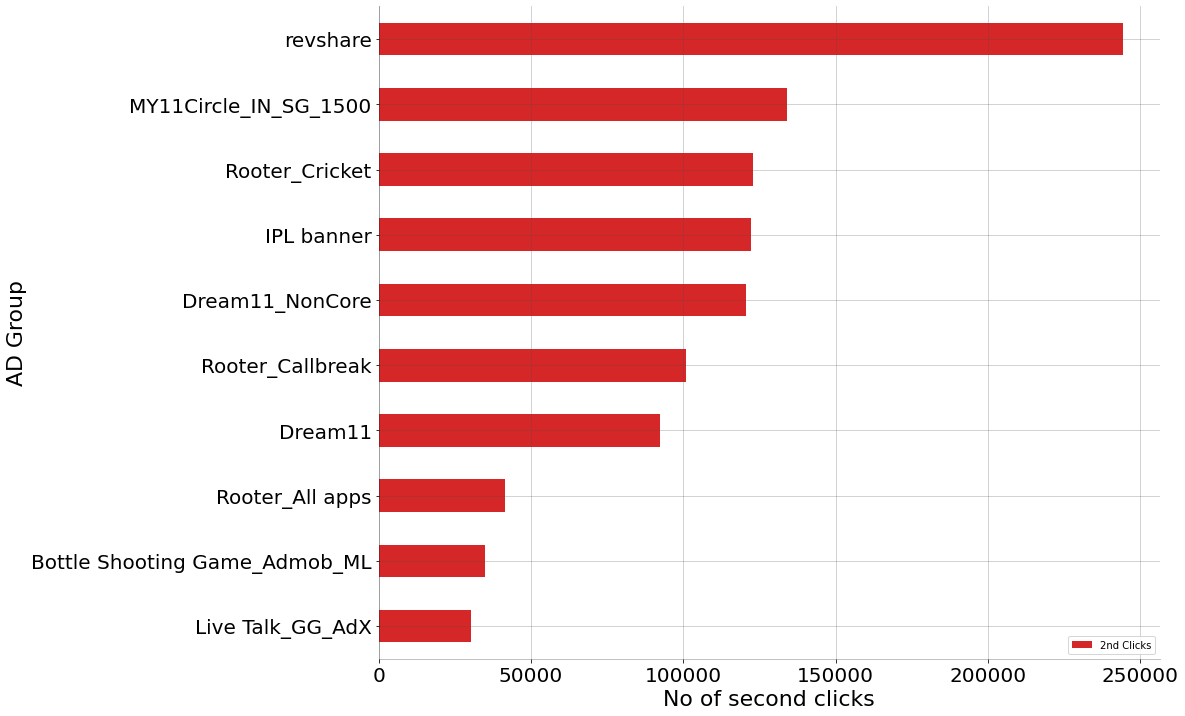

In [ ]:
df_2nd_1.set_index('Ad Group').sort_values(by=['2nd Clicks'],ascending=False).head(10).plot.barh(figsize=(14,12),color='tab:red',linewidth=4)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('AD Group',fontsize=22)

plt.xlabel('No of second clicks', fontsize=22)
plt.grid(color='#4d4d4d')
plt.gca().invert_yaxis()
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   

plt.show()

# Q2

In [ ]:
## Checking if adreq < adresponse
df2=df
df2['req_ad_res']=df2['Ad Requests']< df2['Ad Responses']
df3=df2[df2['req_ad_res']==True] ## This is an error .In 3094 cases adreq < adresponse .There are 3094 times ad respones have come without ad requests .
df3


,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks,req_ad_res
3801,11 Sep 2020,Traffic Bangalore: Check Fines,Traffic bangalore_Admob_New Banner,Karnataka,30.93,139252,139445,99.9%,105400,75.59%,1264,0,True
8508,06 Sep 2020,Indian Train Simulator 2018,Rooter_Cricket,Delhi,2.00,20179,20180,100%,19645,97.3%,1998,2000,True
8838,08 Sep 2020,Indian Train Simulator 2018,Rooter_Cricket,West Bengal,1.48,17321,17322,100%,16947,97.8%,1487,1483,True
9119,07 Sep 2020,Indian Train Simulator 2018,Rooter_Cricket,Telangana,1.47,15336,15337,100%,14957,97.5%,1469,1473,True
10103,07 Sep 2020,Indian Train Simulator 2018,Rooter_Cricket,Bihar,1.14,11385,11387,100%,10992,96.5%,1143,1143,True
10579,07 Sep 2020,Indian Train Simulator 2018,Rooter_Cricket,Karnataka,0.82,9429,9430,100%,9268,98.3%,824,825,True
10720,07 Sep 2020,Indian Train Simulator 2018,Rooter_Cricket,Madhya Pradesh,0.93,9022,9023,100%,8811,97.7%,935,934,True
11260,07 Sep 2020,Indian Train Simulator 2018,Rooter_Cricket,Rajasthan,0.69,7679,7681,100%,7506,97.7%,692,691,True
12271,07 Sep 2020,Indian Train Simulator 2018,Rooter_Cricket,Punjab,0.47,5665,5667,100%,5521,97.4%,475,474,True
12910,07 Sep 2020,MPL,revshare,Unresolved,0.00,4585,4586,100%,0,0.00%,0,0,True


In [ ]:
df.columns

Index(['Date', 'App', 'Ad Group', 'State', 'Revenue', 'Ad Requests',
       'Ad Responses', 'Fill Rate', 'Impressions', 'Render Rate', '1st Clicks',
       '2nd Clicks', 'req_ad_res'],
      dtype='object')

In [ ]:
dd1=df3[['Ad Requests','Ad Responses','req_ad_res']]
dd1.head(10)

,Ad Requests,Ad Responses,req_ad_res
3801,139252,139445,True
8508,20179,20180,True
8838,17321,17322,True
9119,15336,15337,True
10103,11385,11387,True
10579,9429,9430,True
10720,9022,9023,True
11260,7679,7681,True
12271,5665,5667,True
12910,4585,4586,True


In [ ]:
len(dd1)

41

In [ ]:
#Checking fill rate
df4=df
df4['fillrate_check']=(df4['Ad Responses']/df4['Ad Requests'])*100
df4['Fill Rate']=df4['Fill Rate'].str.replace('%','')
df4['fillrate_check']=df4['fillrate_check'].round(decimals=1)
df5=df4[['Fill Rate','fillrate_check']]
df6=df5.dropna(subset=['fillrate_check'])
df6.head(10) ## MUltiple instances are not similar

,Fill Rate,fillrate_check
0,99.9,99.8
1,99.9,0.0
2,99.9,0.0
3,99.9,0.0
4,99.9,99.9
5,99.9,0.0
6,99.9,0.0
7,99.9,0.0
8,100,6.6
9,100,6.6


# Q3

In [ ]:
## Revenue making apps considered important
df_revenue_app=df[df.Revenue != 0.0]
df_revenue_app1=df_revenue_app[['App','Revenue']].groupby(by=['App']).sum().reset_index().sort_values(by='Revenue',ascending=False)
df_revenue_app1.head(10)

,App,Revenue
7,Callbreak Multiplayer,869.40
5,Bottle Shooting Game,753.89
44,World Cricket Championship 2,643.44
41,Traffic Bangalore: Check Fines,280.33
43,World Cricket Championship Lt,145.27
15,Indian Rummy Offline,104.28
40,Tarot Cards Reading and Numerology App,98.86
19,Mindi Offline,87.34
16,Indian Train Simulator 2018,68.51
38,Sticker Maker,61.95


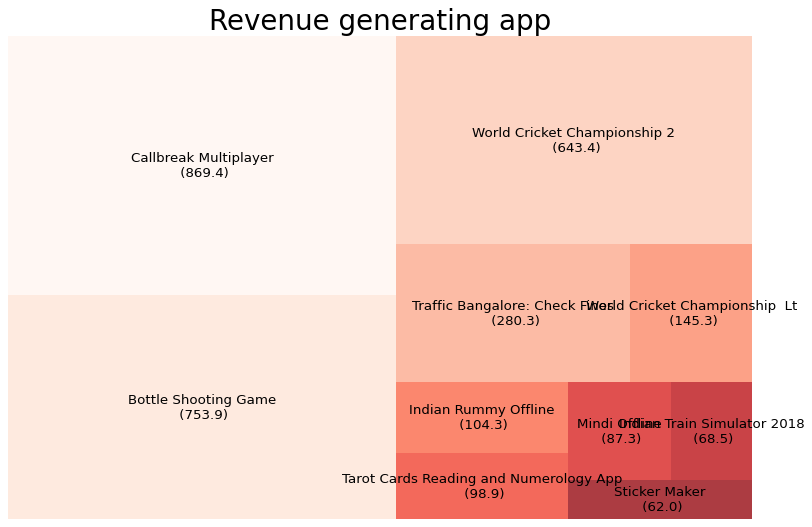

In [ ]:
import squarify 
import matplotlib.pyplot as plt
import textwrap

# Prepare Data
df_3 = df_revenue_app1.head(10).reset_index()
df_3=df_3[['App','Revenue']]
df_3['Revenue']=df_3['Revenue'].round(decimals=1)

labels = df_3.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df_3['Revenue'].values.tolist()
colors = [plt.cm.Reds(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8,text_kwargs={'fontsize':12})

# Decorate
plt.title('Revenue generating app',fontsize=25)
plt.axis('off')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import plotly.express as px
df_4=df_revenue_app1.head(10).copy(deep=True)
df_4['App']=df_4['App'].apply(lambda x: "<br>".join(x.split()))
fig = px.treemap(df_4, path=['App'], values='Revenue',width=1200, height=900)
fig.update_traces(textfont_size=15)
fig.update_layout(uniformtext_minsize=15, uniformtext_mode='show')
fig.show()

# Q4

In [ ]:
df.columns

Index(['Date', 'App', 'Ad Group', 'State', 'Revenue', 'Ad Requests',
       'Ad Responses', 'Fill Rate', 'Impressions', 'Render Rate', '1st Clicks',
       '2nd Clicks', 'req_ad_res', 'fillrate_check'],
      dtype='object')

In [ ]:
df['1st Clicks']=df['1st Clicks'].astype(str)
df['2nd Clicks']=df['2nd Clicks'].astype(str)

In [ ]:
#Ad group with 0 first and second click

dd=df[(df['1st Clicks']=='0')&(df['2nd Clicks']=='0')]
dd['count']=[1]*len(dd)
hashlist1=dd['Ad Group'].value_counts().to_frame().reset_index()
hashlist1.columns=['Ad Group','count']
hashlist1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Ad Group,count
0,revshare,3296
1,Dhani Backfill,2104
2,Rooter_All apps,2078
3,Dream11,628
4,IPL banner,624
...,...,...
182,Sachin Saga_Admob_GG,1
183,QA SDK X Sample Build_Debug_Test AdGroup 2,1
184,OCR Barcod Scanner_Admob,1
185,Blackboard Edutech_Admob,1


In [ ]:

## Checking ad groups having less second click
df_zero_first=df[df['1st Clicks'] > df['2nd Clicks']]

df_zero_first['count']=[1]*len(df_zero_first)
hashlist=df_zero_first['Ad Group'].value_counts().to_frame().reset_index()
hashlist.columns=['Ad Group','count']
hashlist #  ad groups having less second clicks on comparison with first click

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Ad Group,count
0,Dhani Backfill,1293
1,MY11Circle_IN_SG_1500,914
2,IPL banner,905
3,Dream11,786
4,Dream11_NonCore,607
...,...,...
129,Baba Cric_Inmobi_L,1
130,Mindi Offline_Inmobi,1
131,India GST Calculator_Mopub_New,1
132,Gionee Change,1


In [ ]:
df['Fill Rate']=df['Fill Rate'].astype(str)

In [ ]:
#Fill rate 0
df_fillrate_zero=df[df['Fill Rate']=='0.00']
df_fillrate_zero['count']=[1]*len(df_fillrate_zero)
hashlist2=df_fillrate_zero['Ad Group'].value_counts().to_frame().reset_index()
hashlist2.columns=['Ad Group','count']
hashlist2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Ad Group,count
0,SDK X Test Ads 2,25
1,SDK X Test Ads,15
2,revshare,5
3,RC_MH_Stock_Marathi,4
4,IPL banner,4
5,logo with name,3
6,Dream11,2
7,Corona_Banner_Admob,2
8,Dhani Backfill,2
9,Vehicle Owner Details - Native,1


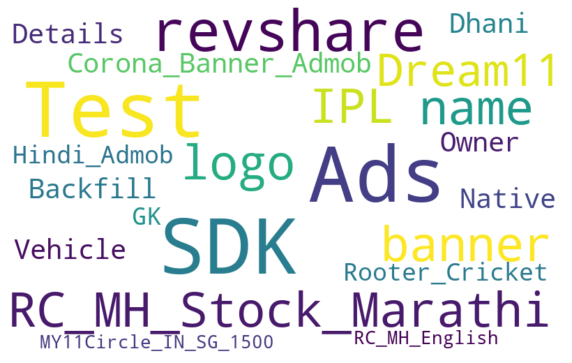

In [ ]:
import matplotlib.pyplot as plt

all_words = ' '.join([text for text in hashlist2['Ad Group'].head(20)])
from wordcloud import WordCloud
wordcloud = WordCloud(background_color ='white',width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Extras

In [ ]:
#Top AD where users have gone to check out the website with 2nd clicks >100
df_top_app=df[df['2nd Clicks']>'100']
df_top_app['count']=[1]*len(df_top_app)
hashlist3=df_top_app['Ad Group'].value_counts().to_frame().reset_index()
hashlist3.columns=['Ad Group','count']
hashlist3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Ad Group,count
0,revshare,2107
1,Rooter_All apps,753
2,Dhani Backfill,686
3,MY11Circle_IN_SG_1500,681
4,IPL banner,656
...,...,...
110,sling kong_Admob_Android_mid,1
111,Guru Cric_Admob,1
112,Test 2,1
113,Gionee Change,1


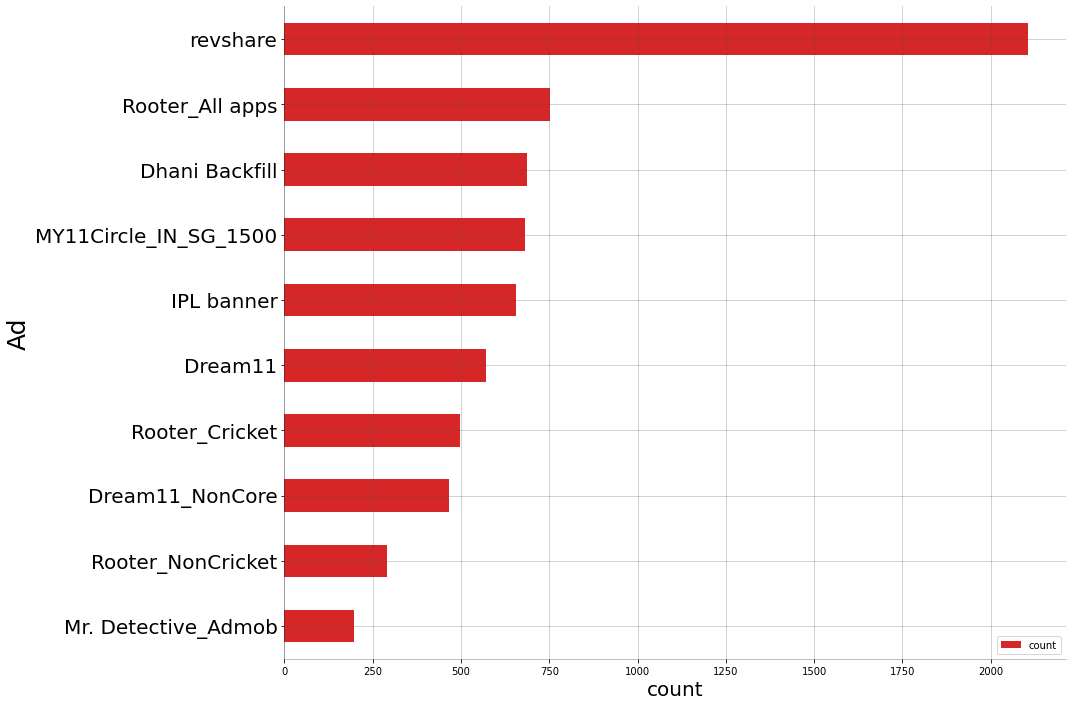

In [ ]:
hashlist3.set_index('Ad Group').sort_values(by=['count'],ascending=False).head(10).plot.barh(figsize=(14,12),color='tab:red',linewidth=4)

plt.yticks(fontsize=20)
plt.xlabel('count',fontsize=20)
plt.ylabel('Ad',fontsize=25)


plt.grid(color='#4d4d4d')
plt.gca().invert_yaxis()
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   

plt.show()

In [ ]:
#Revenue state wise
df_revenue_state=df[['Revenue','State']].groupby(by=['State']).sum().reset_index().sort_values(by='Revenue',ascending=False)
df_revenue_state.head(10)

,State,Revenue
32,Unresolved,738.38
15,Karnataka,362.51
19,Maharashtra,346.33
8,Delhi,242.19
33,Uttar Pradesh,226.13
27,Rajasthan,198.87
10,Gujarat,198.06
5,Bihar,181.61
18,Madhya Pradesh,181.07
35,West Bengal,145.74


In [ ]:
df['Render Rate']=df['Render Rate'].astype(str)

In [ ]:
#Ad with render rate >90 can be requested multiple times
df_ad_render=df[df['Render Rate']>'90']
df_ad_render['count']=[1]*len(df_ad_render)
hashlist4=df_ad_render['Ad Group'].value_counts().to_frame().reset_index()
hashlist4.columns=['Ad Group','count']
hashlist4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Ad Group,count
0,revshare,1528
1,Dhani Backfill,591
2,Rooter_All apps,503
3,Rooter_Cricket,365
4,Dream11_NonCore,309
...,...,...
92,Motu Patlu Cooking_Inmobi_L,1
93,Motu Patlu Cricket Game_Inmobi_L,1
94,Nexplay - Banner - Admob,1
95,Sling Kong_Admob_Android_all floors,1


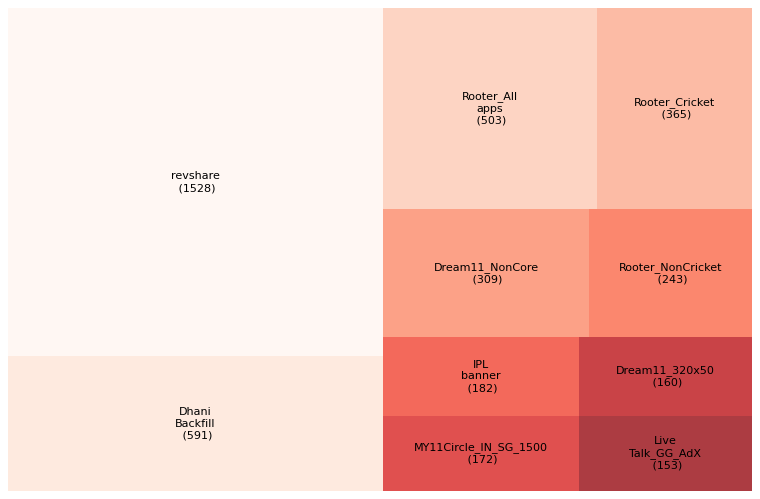

In [ ]:
 
import squarify 


# Prepare Data
df7 = hashlist4.head(10)

labels = df7.apply(lambda x: "\n".join(str(x[0]).split()) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df7['count'].values.tolist()
colors = [plt.cm.Reds(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)
plt.gca().invert_yaxis()

# Decorate

plt.axis('off')
plt.show()